# Методы описательной статистики

In [121]:
import statistics as st
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


data = [13.39, 13.42, 13.38, 13.53, 13.51, 13.20, 13.40,
 13.40, 13.28, 13.43, 13.46, 13.53, 13.55, 13.29, 13.24,
 13.34, 13.54, 13.66, 13.43, 13.42, 13.38, 13.34, 13.57,
 13.26, 13.33, 13.43, 13.50, 13.44, 13.53, 13.48, 13.48,
 13.34, 13.36, 13.59, 13.36, 13.44, 13.34, 13.33, 13.25,
 13.28, 13.49, 13.33, 13.26, 13.26, 13.55, 13.54, 13.37,
 13.31, 13.37, 13.33]

## Анализ одной переменной - Суммарные характеристики

In [122]:
analysis = {}

analysis['unique'] = set(data)

analysis['count'] = len(data)
analysis['sum'] = sum(data)
analysis['mean'] = analysis['sum'] / analysis['count']

# если количество элементов нечетное, то медиана - центральный элемент,
# если четное, то среднее двух центральных
analysis['median'] = st.median(data)

# значение, которое встречается максимально часто
analysis['mode'] = st.mode(data)

# среднее геометрическое равно корню степени количества элементов
# от произведения элементов
analysis['g_mean'] = st.geometric_mean(data)

# дисперсия
analysis['variance'] = st.variance(data)
# стандартное отклонение
analysis['stdev'] = st.stdev(data)
# стандартная ошибка
analysis['sterr'] = analysis['stdev'] / np.sqrt( analysis['count'] )
analysis['min'] = min(data)
analysis['max'] = max(data)
analysis['range'] = analysis['max'] - analysis['min']

# pandas series
data_series = pd.Series(data)

# 1ый и 3ий квантили
analysis['lqua'], analysis['uqua'] = data_series.quantile([.25, .75])
analysis['rqua'] = abs(analysis['uqua'] - analysis['lqua'])

# ассиметрия
analysis['skewness'] = data_series.skew()
# куртоз
analysis['kurtosis'] = data_series.kurtosis()

# коэффициент вариации
analysis['cvar'] = analysis['stdev'] / analysis['mean']

# # output
print('\
Количество = {d[count]}\n\
Среднее значение = {d[mean]}\n\
Медиана = {d[median]}\n\
Мода = {d[mode]}\n\
Геометрическое среднее = {d[g_mean]}\n\
Дисперсия = {d[variance]}\n\
Стандартное отклонение = {d[stdev]}\n\
Стандартное ошибка = {d[sterr]}\n\
Минимальное значение = {d[min]}\n\
Максимальное значение = {d[max]}\n\
Размах = {d[range]}\n\
Первый квартиль = {d[lqua]}\n\
Третий квартиль = {d[uqua]}\n\
Межквартильный размах = {d[rqua]}\n\
Ассиметрия = {d[skewness]}\n\
Куртоз = {d[kurtosis]}\n\
Коэффициент вариации = {d[cvar]}\n\
Сумма = {d[sum]}\n\
'.format(d=analysis)
)

Количество = 50
Среднее значение = 13.404799999999996
Медиана = 13.395
Мода = 13.34
Геометрическое среднее = 13.40438609611371
Дисперсия = 0.01133567346938777
Стандартное отклонение = 0.10646911979249087
Стандартное ошибка = 0.015057007318446631
Минимальное значение = 13.2
Максимальное значение = 13.66
Размах = 0.46000000000000085
Первый квартиль = 13.33
Третий квартиль = 13.4875
Межквартильный размах = 0.15750000000000064
Ассиметрия = 0.22975931371947317
Куртоз = -0.6563734970791959
Коэффициент вариации = 0.007942611586334067
Сумма = 670.2399999999998



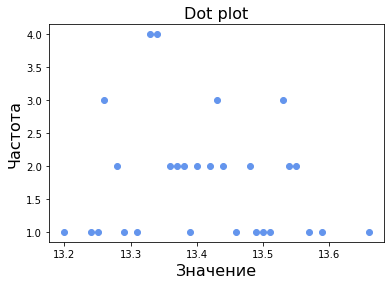

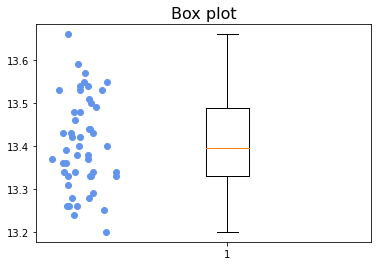

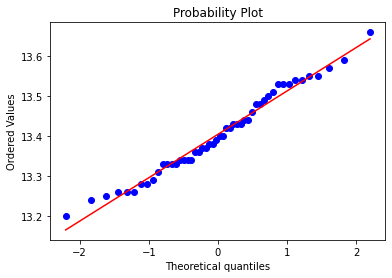

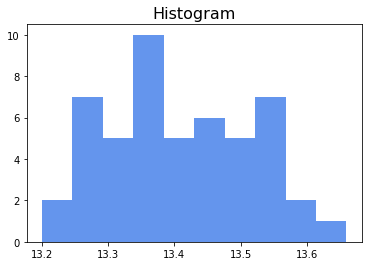

In [123]:
FONTSIZE = 16
COLOR = 'cornflowerblue'

# Dot plot
plt.title('Dot plot', fontsize=FONTSIZE)
plt.xlabel('Значение', fontsize=FONTSIZE)
plt.ylabel('Частота', fontsize=FONTSIZE)

plt.plot(
	list(analysis['unique']),
	[data.count(i) for i in analysis['unique']],
	'o',
	color=COLOR,
)

plt.show()


# Box plot
plt.title('Box plot', fontsize=FONTSIZE)

plt.boxplot(data)
norm_x_dist = np.random.normal(loc=0.5, scale=0.05, size=analysis['count'])
for i in range(0, analysis['count']):
	plt.scatter(norm_x_dist[i], data[i], color=COLOR)

plt.show()


# QQ plot
stats.probplot(data, dist='norm', plot=plt)

plt.show()


# Histogram
plt.title('Histogram', fontsize=FONTSIZE)

plt.hist(data, color=COLOR)

plt.show()